This model is to predict a person's progression with the condition based on various attributes about them.

In [58]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Import data.
diabetes = pd.read_csv("diabetes_updated.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
diabetes.shape

(768, 9)

In [27]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\Users\fpett\anaconda3.1\envs\VSC_DataScienceCourse\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


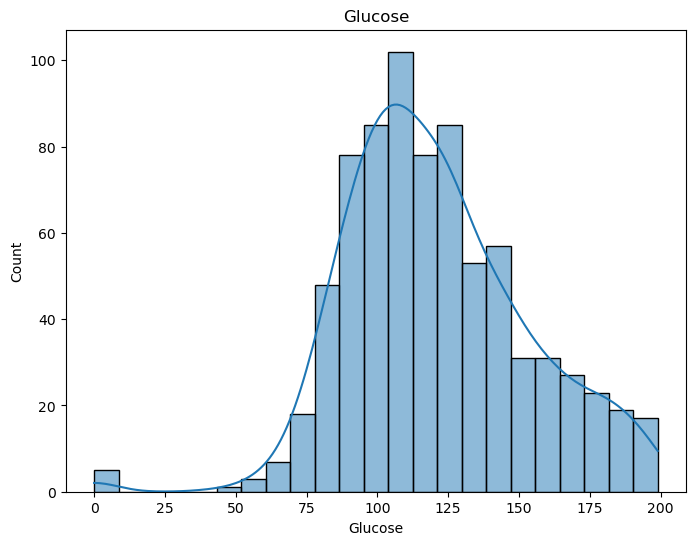

In [29]:
# Differentiate between independent and dependent variables.
# Glucose is the independent variable as it is not a personal attribute demonstrating the person's progression with the disease.
# Also the values are normally distributed.
plt.figure (figsize=(8,6))
sns.histplot(diabetes['Glucose'], kde=True)
plt.xlabel('Glucose')
plt.title('Glucose')
plt.show()

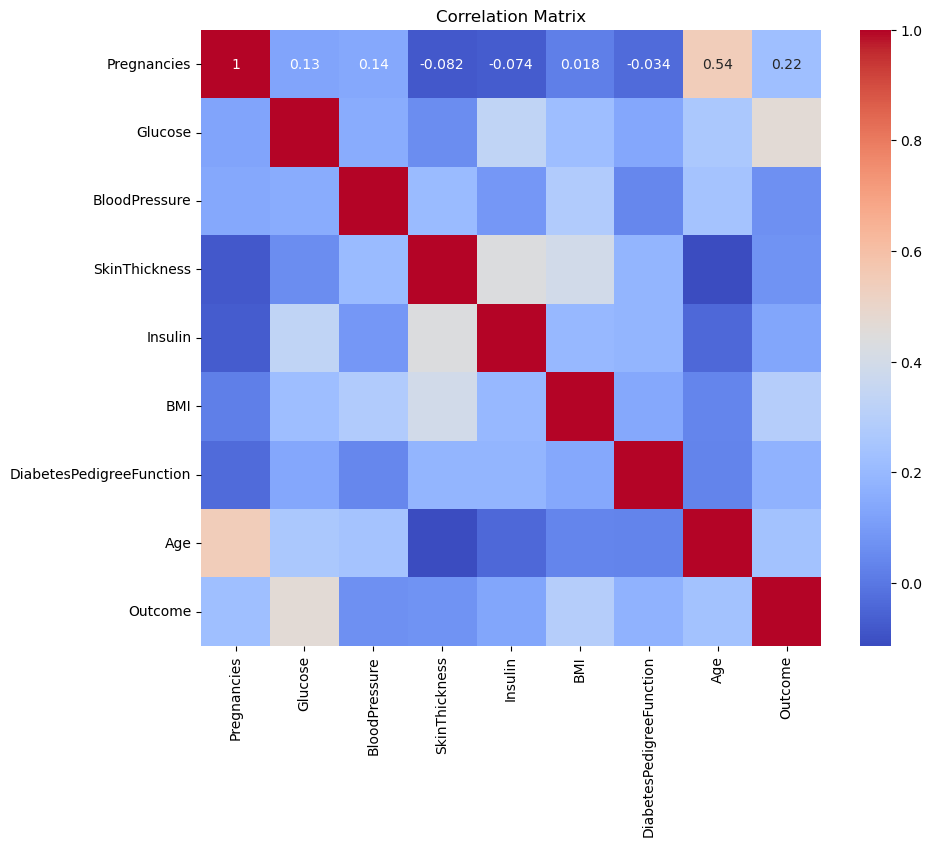

In [30]:
# Visualize the correlation matrix
corr_matrix = diabetes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Assign variables to x and y

# Feature matrix and target vector
X = diabetes.drop('Glucose', axis=1)  # We assume 'Glucose' is the column we want to predict
y = diabetes['Glucose']


In [32]:
# Generate training and test sets comprising 80% and 20 % of the data, respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Create a pipeline with scaling and model.
pipeline = Pipeline (steps=[
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

In [37]:
# Fit the pipeline to the training set.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [38]:
# Generate multiple linear regression model usig the training set.
# Use all of the independent variables.
y_predict = pipeline.predict(X_test)

In [59]:
param_grid = {
    "regressor": [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
}

In [61]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'regressor': Ridge()}
Best score:  0.3286854312828734


In [62]:
# Print the coefficients of the trained model.
best_model = grid_search.best_estimator_
coef_df = pd.DataFrame(
    data=best_model["regressor"].coef_,
    index=X.columns,
    columns=["Coefficient"]
)
print("Model Coefficients:")
print(coef_df)

Model Coefficients:
                          Coefficient
Pregnancies                 -0.487584
BloodPressure                2.524400
SkinThickness               -6.049118
Insulin                     11.448524
BMI                          2.354390
DiabetesPedigreeFunction     1.491084
Age                          4.703310
Outcome                     11.311972


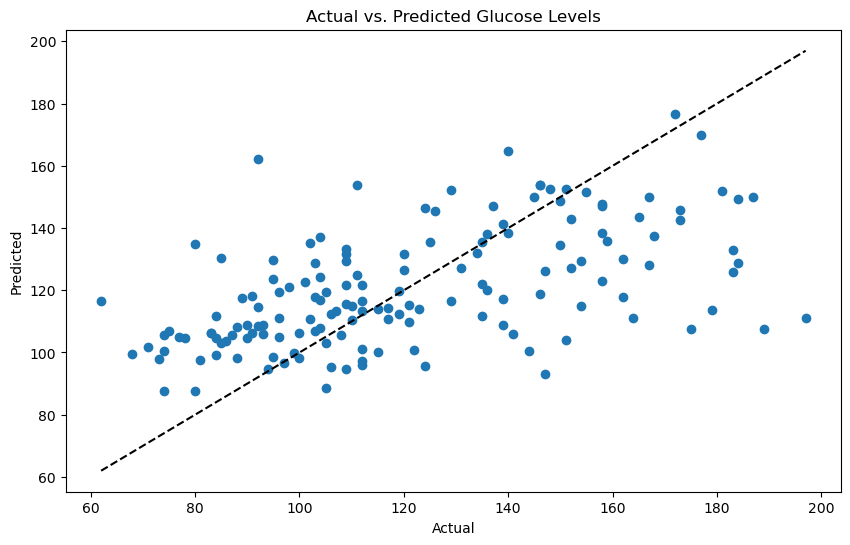

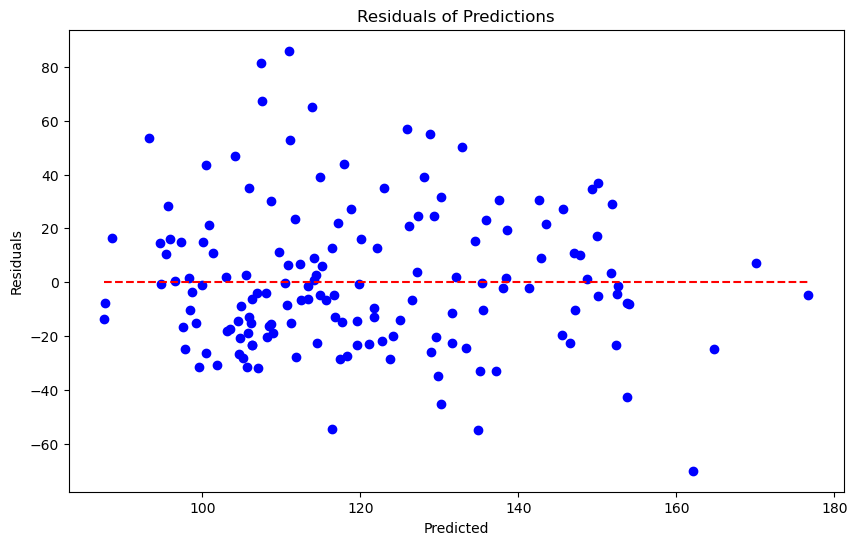

In [43]:
# Generate predictions for the test set. Compare the values used to make 
# these predictions to the ones in the original data set using a residuals plot.

# Predict the housing prices on the test set
y_predict = pipeline.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Glucose Levels')
plt.show()

# Residuals plot
residuals = y_test - y_predict
plt.figure(figsize=(10,6))
plt.scatter(y_predict, residuals, c='blue')
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()


In [39]:
# Compute R-squared for model on the test set. Use r2_score to obtain this.
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 704.6762254136173
R-squared: 0.299741697015366


In [ ]:
# Include comments about code and note about model outputs like R-squared.

Despite the clean dataset the results are not clear as we would like. While the Actual vs. Predicted Glucose Levels do somewhat follow the line, it would be better if they were closer or on the line. Also,  the r2 should be closer to 1, but it is quite far from this.

Without an understanding of the relevance of some of the data, such as the Outcome column, it seems negligent to drop any of the data. However, doing so may provide a clearer result from the machine learning model. 